# Recipe 3-7. Reloading a Model Problem

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

In [4]:
'''
torch.unsqueeze(input, dim, out=None):
    返回一个新的张量，对输入的既定位置插入维度 1
torch.squeeze(input, dim=None, out=None):
    将输入张量形状中的1 去除并返回。 如果输入是形如(A×1×B×1×C×1×D)，那么输出形状就为： (A×B×C×D)
    当给定dim时，那么挤压操作只在给定维度上。
        例如，输入形状为: (A×1×B), squeeze(input, 0) 将会保持张量不变。
        只有用 squeeze(input, 1)，形状会变成 (A×B)。

'''

'\ntorch.unsqueeze(input, dim, out=None):\n    返回一个新的张量，对输入的既定位置插入维度 1\ntorch.squeeze(input, dim=None, out=None):\n    将输入张量形状中的1 去除并返回。 如果输入是形如(A×1×B×1×C×1×D)，那么输出形状就为： (A×B×C×D)\n    当给定dim时，那么挤压操作只在给定维度上。\n        例如，输入形状为: (A×1×B), squeeze(input, 0) 将会保持张量不变。\n        只有用 squeeze(input, 1)，形状会变成 (A×B)。\n\n'

In [5]:
#sample data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [7]:
'''
The net1 object is the trained neural network model, which can be stored using two different protocols:
    (1) save the entire neural network model with all the weightsand biases, and 
    (2) save the model using only the weights. 

If the trained model object is very heavy in terms of size,
    we should save only the parameters that are weights;
if the trained object size is low, then the entire model can be stored.
'''

'\nThe net1 object is the trained neural network model, which can be stored using two different protocols:\n    (1) save the entire neural network model with all the weightsand biases, and \n    (2) save the model using only the weights. \n\nIf the trained model object is very heavy in terms of size,\n    we should save only the parameters that are weights;\nif the trained object size is low, then the entire model can be stored.\n'

In [8]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [9]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [10]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

In [11]:
'''
To restore the model, we can use the load_state_dict() function to load the parameters of the model.
If we see the following three models in the graph, they are identical,
    because net2 and net3 are copies of net1.
'''

'\nTo restore the model, we can use the load_state_dict() function to load the parameters of the model.\nIf we see the following three models in the graph, they are identical,\n    because net2 and net3 are copies of net1.\n'

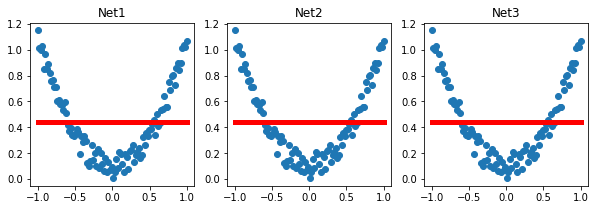

In [12]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()